# Контрольная работа

## ЗАДАЧА
Необходимо построить прогнозную модель, которая сможет определить, перестанет ли клиент банка пользоваться кредитной картой.

 

### ДАННЫЕ

/opt/train.csv — датасет для обучения;

/opt/validation.csv — датасет для итоговой оценки.

### Импортируем необходимые библиотеки

In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import squarify
from wordcloud import WordCloud
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc,
                             classification_report)

### Достаем данные:

In [6]:
train = pd.read_csv('C:\\Users\\shere\\OneDrive\\Рабочий стол\\MFTI\\Math\\Контрольная работа\\train.csv')
test = pd.read_csv('C:\\Users\\shere\\OneDrive\\Рабочий стол\\MFTI\\Math\\Контрольная работа\\validation.csv')
train.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,7.595000e+03,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.00000,7595.000000,7595.000000,7595.000000,7595.000000
mean,7.393515e+08,46.302962,2.353259,35.929427,3.814352,2.354575,2.458328,8654.540276,1165.152337,7489.387939,0.75955,4401.725082,64.812640,0.712562,0.273745
std,3.698152e+07,7.951111,1.298548,7.899472,1.547264,1.009706,1.105780,9102.153894,813.742319,9101.371884,0.22115,3402.500709,23.536378,0.240984,0.274267
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.00000,530.000000,10.000000,0.000000,0.000000
25%,7.130482e+08,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2554.000000,453.000000,1352.500000,0.63100,2144.000000,45.000000,0.579000,0.025000
50%,7.179543e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4562.000000,1285.000000,3492.000000,0.73700,3895.000000,67.000000,0.700000,0.176000
75%,7.741359e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11104.000000,1779.000000,9894.000000,0.85800,4738.500000,80.000000,0.821000,0.496000
max,8.282989e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.39700,18484.000000,139.000000,3.714000,0.999000


In [9]:
train.isna().sum()

CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

Age mean :  46.302962475312704
Age median :  46.0


c:\Users\shere\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


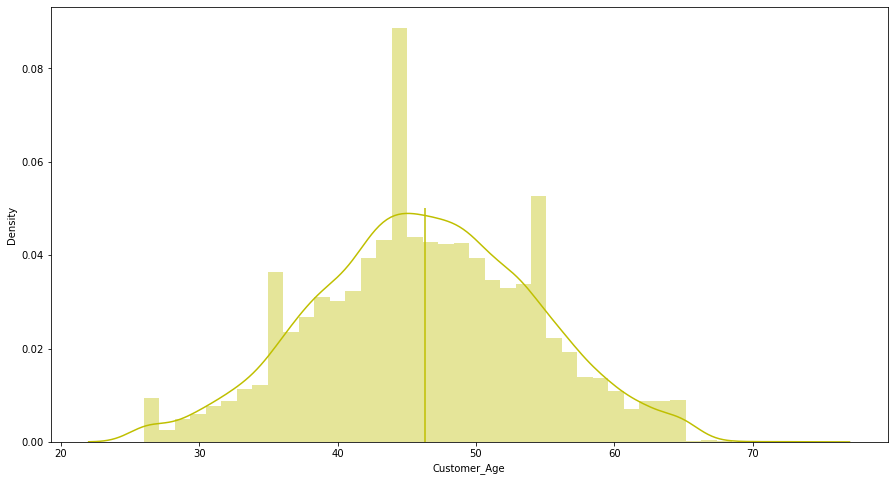

In [12]:
plt.figure(figsize=(15,8))
sns.distplot(train['Customer_Age'], color = 'y')
age_mean = train['Customer_Age'].mean()
plt.vlines(age_mean, 0, 0.05, color = 'y')
print('Age mean : ', age_mean)
print('Age median : ', train['Customer_Age'].median())

In [99]:
test['Customer_Age_Categorized'] = pd.cut(train['Customer_Age'], bins=5)

In [15]:
train['Customer_Age_Categorized'] = pd.cut(train['Customer_Age'], bins=5)
train.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag,Customer_Age_Categorized
0,715630983,31,F,0,Graduate,Single,Less than $40K,Blue,21,4,...,4598.0,0,4598.0,0.439,6317,77,0.833,0.000,Attrited Customer,"(25.953, 35.4]"
1,713643858,53,F,1,College,Married,$40K - $60K,Blue,43,4,...,1525.0,1411,114.0,0.660,1911,47,0.958,0.925,Existing Customer,"(44.8, 54.2]"
2,708334158,46,F,3,Graduate,Divorced,Less than $40K,Blue,34,4,...,9863.0,686,9177.0,0.581,3068,58,0.933,0.070,Existing Customer,"(44.8, 54.2]"
3,711033408,50,F,2,High School,Married,Less than $40K,Blue,36,5,...,9355.0,1626,7729.0,0.701,1230,28,0.867,0.174,Existing Customer,"(44.8, 54.2]"
4,711368283,39,M,2,Unknown,Married,$80K - $120K,Blue,27,3,...,34516.0,1629,32887.0,1.078,3448,53,1.038,0.047,Existing Customer,"(35.4, 44.8]"


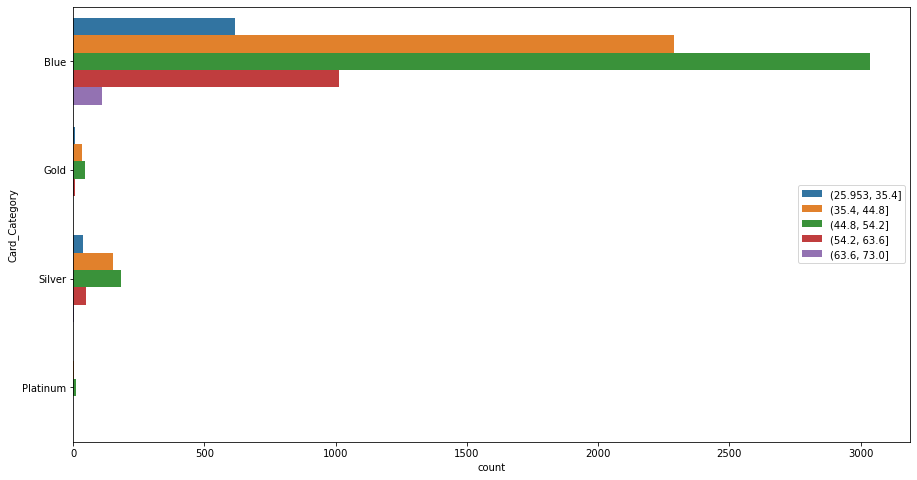

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(y='Card_Category', hue='Customer_Age_Categorized', data = train)
plt.legend(loc = 'center right')

In [100]:
test.groupby('Card_Category')['Customer_Age_Categorized'].value_counts()

Card_Category                
Blue           (44.8, 54.2]      989
               (35.4, 44.8]      795
               (54.2, 63.6]      328
               (25.953, 35.4]    215
               (63.6, 73.0]       44
Gold           (44.8, 54.2]       12
               (35.4, 44.8]        8
               (54.2, 63.6]        4
               (25.953, 35.4]      1
               (63.6, 73.0]        0
Platinum       (35.4, 44.8]        2
               (54.2, 63.6]        2
               (25.953, 35.4]      0
               (44.8, 54.2]        0
               (63.6, 73.0]        0
Silver         (44.8, 54.2]       57
               (35.4, 44.8]       42
               (54.2, 63.6]       17
               (25.953, 35.4]     15
               (63.6, 73.0]        1
Name: Customer_Age_Categorized, dtype: int64

In [22]:
train.groupby('Card_Category')['Customer_Age_Categorized'].value_counts()

Card_Category                
Blue           (44.8, 54.2]      3037
               (35.4, 44.8]      2290
               (54.2, 63.6]      1012
               (25.953, 35.4]     617
               (63.6, 73.0]       109
Gold           (44.8, 54.2]        45
               (35.4, 44.8]        32
               (25.953, 35.4]       8
               (54.2, 63.6]         6
               (63.6, 73.0]         0
Platinum       (44.8, 54.2]        11
               (35.4, 44.8]         4
               (54.2, 63.6]         1
               (25.953, 35.4]       0
               (63.6, 73.0]         0
Silver         (44.8, 54.2]       181
               (35.4, 44.8]       152
               (54.2, 63.6]        48
               (25.953, 35.4]      39
               (63.6, 73.0]         3
Name: Customer_Age_Categorized, dtype: int64

In [24]:
train['Gender'].value_counts()

F    4010
M    3585
Name: Gender, dtype: int64

In [26]:
train.groupby('Gender')['Credit_Limit'].agg(['mean','count'])

,mean,count
Gender,,
F,5090.101845,4010
M,12641.541144,3585


Note : Females are using more credit card but males credit limit more than females.

In [28]:
train.groupby('Income_Category')['Card_Category'].value_counts()

Income_Category  Card_Category
$120K +          Blue              489
                 Silver             49
                 Gold               16
                 Platinum            4
$40K - $60K      Blue             1222
                 Silver             75
                 Gold               12
$60K - $80K      Blue              960
                 Silver             65
                 Gold               19
                 Platinum            3
$80K - $120K     Blue             1052
                 Silver             87
                 Gold               19
                 Platinum            2
Less than $40K   Blue             2552
                 Silver            103
                 Gold               18
                 Platinum            2
Unknown          Blue              790
                 Silver             44
                 Gold                7
                 Platinum            5
Name: Card_Category, dtype: int64

In [32]:
churn = train[train["Attrition_Flag"] == 'Attrited Customer']
non_churn = train[train["Attrition_Flag"] == 'Existing Customer']

In [30]:
churn.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag,Customer_Age_Categorized
0,715630983,31,F,0,Graduate,Single,Less than $40K,Blue,21,4,...,4598.0,0,4598.0,0.439,6317,77,0.833,0.000,Attrited Customer,"(25.953, 35.4]"
13,710116833,59,F,1,High School,Single,$40K - $60K,Blue,36,5,...,1665.0,0,1665.0,1.010,2748,40,0.333,0.000,Attrited Customer,"(54.2, 63.6]"
23,715327683,45,F,4,Post-Graduate,Single,Less than $40K,Blue,36,1,...,4477.0,2517,1960.0,1.022,4996,55,0.486,0.562,Attrited Customer,"(44.8, 54.2]"
43,708888633,52,M,3,Doctorate,Married,$80K - $120K,Blue,36,2,...,3022.0,895,2127.0,0.950,2724,38,0.900,0.296,Attrited Customer,"(44.8, 54.2]"
52,714391683,39,M,4,Unknown,Married,$60K - $80K,Gold,36,4,...,34516.0,2517,31999.0,0.841,8248,66,0.650,0.073,Attrited Customer,"(35.4, 44.8]"


In [31]:
churn.groupby("Gender").agg({"Credit_Limit":"mean", "Customer_Age":"mean","Attrition_Flag":"count"})

,Credit_Limit,Customer_Age,Attrition_Flag
Gender,,,
F,4722.672198,46.622999,687
M,12533.160788,46.703565,533


## Проверим корреляцию

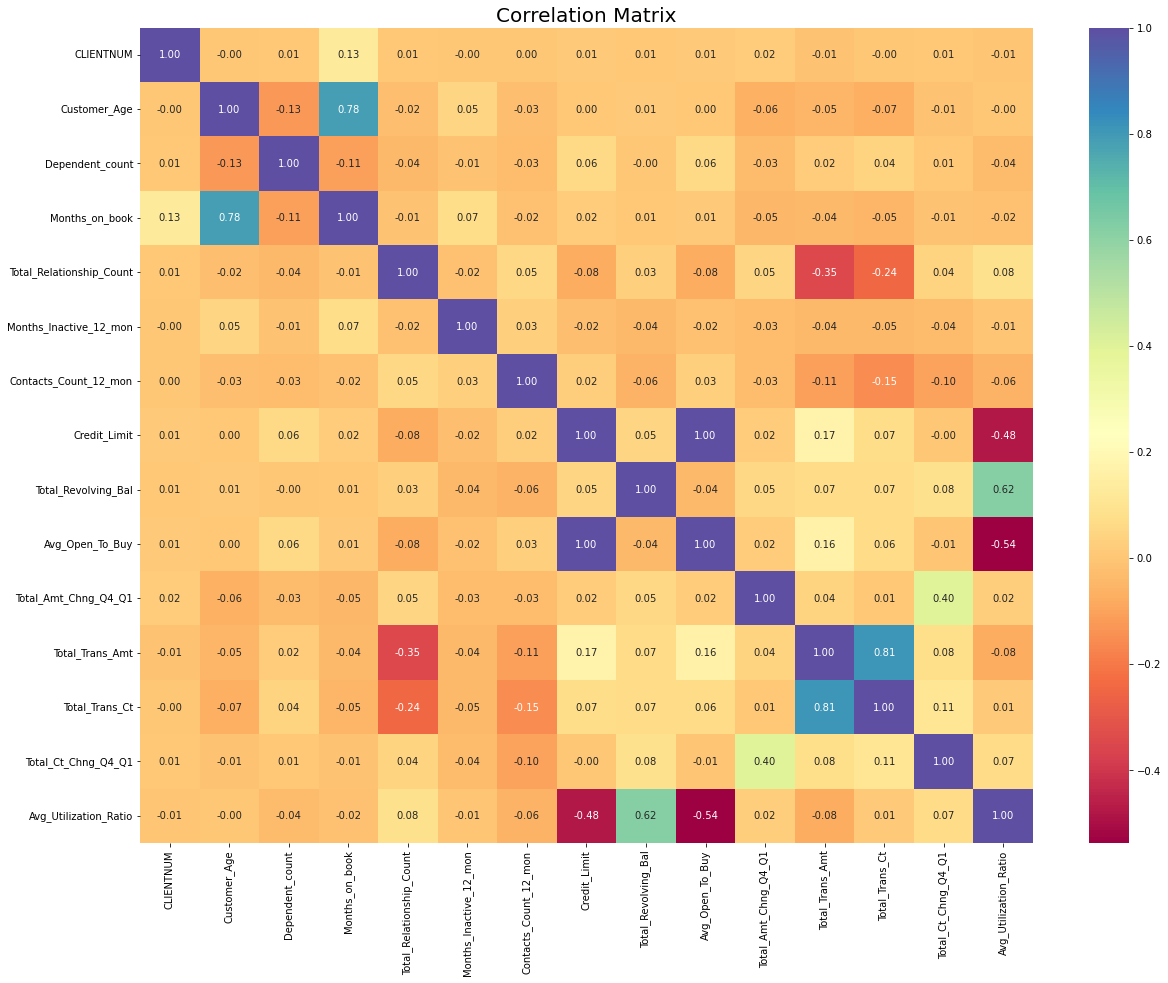

In [34]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(train.corr(), annot=True, fmt=".2f", ax=ax, cmap = "Spectral" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

### Подготовим данные

In [39]:
train.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag,Customer_Age_Categorized
0,715630983,31,F,0,Graduate,Single,Less than $40K,Blue,21,4,...,3,4598.0,0,0.439,6317,77,0.833,0.000,Attrited Customer,"(25.953, 35.4]"
1,713643858,53,F,1,College,Married,$40K - $60K,Blue,43,4,...,2,1525.0,1411,0.660,1911,47,0.958,0.925,Existing Customer,"(44.8, 54.2]"
2,708334158,46,F,3,Graduate,Divorced,Less than $40K,Blue,34,4,...,4,9863.0,686,0.581,3068,58,0.933,0.070,Existing Customer,"(44.8, 54.2]"
3,711033408,50,F,2,High School,Married,Less than $40K,Blue,36,5,...,2,9355.0,1626,0.701,1230,28,0.867,0.174,Existing Customer,"(44.8, 54.2]"
4,711368283,39,M,2,Unknown,Married,$80K - $120K,Blue,27,3,...,2,34516.0,1629,1.078,3448,53,1.038,0.047,Existing Customer,"(35.4, 44.8]"


In [44]:
train.Attrition_Flag.unique()

array(['Attrited Customer', 'Existing Customer'], dtype=object)

In [45]:
cleanup_nums = {"Gender":     {"M": 0, "F": 1},
                "Marital_Status": {"Single": 0, "Married": 1, "Unknown": 2, "Divorced": 3},
                "Attrition_Flag": {"Existing Customer":0 , "Attrited Customer": 1}}

train.replace(cleanup_nums, inplace=True)

In [ ]:
X = train.drop(["Attrition_Flag","education_College","education_Doctorate","education_Graduate","education_High School","education_Post-Graduate","education_Uneducated",
                        "education_Unknown","income_$120K +","income_$40K - $60K","income_$60K - $80K","income_$80K - $120K","income_Less than $40K","income_Unknown",
                        "card_Blue","card_Gold","card_Platinum","card_Silver","age_cat_(25.953, 35.4]","age_cat_(35.4, 44.8]","age_cat_(44.8, 54.2]","age_cat_(54.2, 63.6]",
                        "age_cat_(63.6, 73.0]"], axis = 1)
cols = X.columns
index = X.indexX = train.drop(["Attrition_Flag","education_College","education_Doctorate","education_Graduate","education_High School","education_Post-Graduate","education_Uneducated",
                        "education_Unknown","income_$120K +","income_$40K - $60K","income_$60K - $80K","income_$80K - $120K","income_Less than $40K","income_Unknown",
                        "card_Blue","card_Gold","card_Platinum","card_Silver","age_cat_(25.953, 35.4]","age_cat_(35.4, 44.8]","age_cat_(44.8, 54.2]","age_cat_(54.2, 63.6]",
                        "age_cat_(63.6, 73.0]"], axis = 1)
cols = X.columns
index = X.index

In [46]:
train = pd.get_dummies(train, columns=["Education_Level", "Income_Category","Card_Category","Customer_Age_Categorized"], prefix=["education", "income", "card","age_cat"])

In [47]:
categorical_data = train[["education_College","education_Doctorate","education_Graduate","education_High School","education_Post-Graduate","education_Uneducated",
                        "education_Unknown","income_$120K +","income_$40K - $60K","income_$60K - $80K","income_$80K - $120K","income_Less than $40K","income_Unknown",
                        "card_Blue","card_Gold","card_Platinum","card_Silver","age_cat_(25.953, 35.4]","age_cat_(35.4, 44.8]","age_cat_(44.8, 54.2]","age_cat_(54.2, 63.6]",
                        "age_cat_(63.6, 73.0]"]]

In [48]:
y = train["Attrition_Flag"]
X = train.drop(["Attrition_Flag","education_College","education_Doctorate","education_Graduate","education_High School","education_Post-Graduate","education_Uneducated",
                        "education_Unknown","income_$120K +","income_$40K - $60K","income_$60K - $80K","income_$80K - $120K","income_Less than $40K","income_Unknown",
                        "card_Blue","card_Gold","card_Platinum","card_Silver","age_cat_(25.953, 35.4]","age_cat_(35.4, 44.8]","age_cat_(44.8, 54.2]","age_cat_(54.2, 63.6]",
                        "age_cat_(63.6, 73.0]"], axis = 1)
cols = X.columns
index = X.index

In [109]:
test = test.drop(["Attrition_Flag","education_College","education_Doctorate","education_Graduate","education_High School","education_Post-Graduate","education_Uneducated",
                        "education_Unknown","income_$120K +","income_$40K - $60K","income_$60K - $80K","income_$80K - $120K","income_Less than $40K","income_Unknown",
                        "card_Blue","card_Gold","card_Platinum","card_Silver","age_cat_(25.953, 35.4]","age_cat_(35.4, 44.8]","age_cat_(44.8, 54.2]","age_cat_(54.2, 63.6]",
                        "age_cat_(63.6, 73.0]"])

KeyError: "['Attrition_Flag', 'education_College', 'education_Doctorate', 'education_Graduate', 'education_High School', 'education_Post-Graduate', 'education_Uneducated', 'education_Unknown', 'income_$120K +', 'income_$40K - $60K', 'income_$60K - $80K', 'income_$80K - $120K', 'income_Less than $40K', 'income_Unknown', 'card_Blue', 'card_Gold', 'card_Platinum', 'card_Silver', 'age_cat_(25.953, 35.4]', 'age_cat_(35.4, 44.8]', 'age_cat_(44.8, 54.2]', 'age_cat_(54.2, 63.6]', 'age_cat_(63.6, 73.0]'] not found in axis"

In [49]:
X.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,715630983,31,1,0,0,21,4,2,3,4598.0,0,0.439,6317,77,0.833,0.000
1,713643858,53,1,1,1,43,4,4,2,1525.0,1411,0.660,1911,47,0.958,0.925
2,708334158,46,1,3,3,34,4,2,4,9863.0,686,0.581,3068,58,0.933,0.070
3,711033408,50,1,2,1,36,5,1,2,9355.0,1626,0.701,1230,28,0.867,0.174
4,711368283,39,0,2,1,27,3,3,2,34516.0,1629,1.078,3448,53,1.038,0.047


In [50]:
print(X.shape, y.shape)

(7595, 16) (7595,)


In [52]:
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)
X = pd.concat([X,categorical_data], axis = 1)
X.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,income_Unknown,card_Blue,card_Gold,card_Platinum,card_Silver,"age_cat_(25.953, 35.4]","age_cat_(35.4, 44.8]","age_cat_(44.8, 54.2]","age_cat_(54.2, 63.6]","age_cat_(63.6, 73.0]"
0,-0.038033,-1.363636,0.0,-1.0,-1.0,-1.875,0.0,0.0,1.0,0.004211,...,0,1,0,0,0,1,0,0,0,0
1,-0.070562,0.636364,0.0,-0.5,0.0,0.875,0.0,2.0,0.0,-0.355205,...,0,1,0,0,0,0,0,1,0,0
2,-0.157481,0.000000,0.0,0.5,2.0,-0.250,0.0,0.0,2.0,0.620000,...,0,1,0,0,0,0,0,1,0,0
3,-0.113295,0.363636,0.0,0.0,0.0,0.000,0.5,-1.0,0.0,0.560585,...,0,1,0,0,0,0,0,1,0,0
4,-0.107813,-0.636364,-1.0,0.0,0.0,-1.125,-0.5,1.0,0.0,3.503392,...,0,1,0,0,0,0,1,0,0,0


In [53]:
print("X.shape:",X.shape)
print("y.shape",y.shape)

X.shape: (7595, 38)
y.shape (7595,)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [69]:
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 20)))
models.append(('Random Forest', RandomForestClassifier(random_state = 20)))
models.append(('SVM', SVC(gamma='auto', random_state = 20)))
models.append(('XGBoost', GradientBoostingClassifier(random_state = 20)))
models.append(("CatBoost", CatBoostClassifier(random_state = 20, verbose = False)))

# evaluate each model in turn
results = []
names = []

In [59]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Naive Bayes : 0.8736010533245556
KNN : 0.8992758393680053
CART : 0.9400921658986175
Random Forest : 0.945358788676761
SVM : 0.9183673469387755
XGBoost : 0.9611586570111915
CatBoost : 0.9697169190256748


In [72]:
Final_model = ("CatBoost", CatBoostClassifier(random_state = 20, verbose = False))

In [60]:
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Existing Customer","Attrited Customer"]))

                   precision    recall  f1-score   support

Existing Customer       0.91      0.98      0.94      1273
Attrited Customer       0.80      0.50      0.62       246

         accuracy                           0.90      1519
        macro avg       0.86      0.74      0.78      1519
     weighted avg       0.89      0.90      0.89      1519



In [85]:
y = train["Attrition_Flag"]
X = train.drop(["Attrition_Flag","education_College","education_Doctorate","education_Graduate","education_High School","education_Post-Graduate","education_Uneducated",
                        "education_Unknown","income_$120K +","income_$40K - $60K","income_$60K - $80K","income_$80K - $120K","income_Less than $40K","income_Unknown",
                        "card_Blue","card_Gold","card_Platinum","card_Silver","age_cat_(25.953, 35.4]","age_cat_(35.4, 44.8]","age_cat_(44.8, 54.2]","age_cat_(54.2, 63.6]",
                        "age_cat_(63.6, 73.0]"], axis = 1)
cols = X.columns
index = X.index

In [92]:
def try_model(model, X_train, y_train, X_test, y_test, model_params=None):
    if model_params is None:
        model_params = dict()
    print(model.__name__)
    pipeline = make_pipeline(StandardScaler(), model(**model_params))
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred))

    fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.legend()
 
    return pipeline

LogisticRegression
Accuracy: 0.9111257406188282
Precision: 0.7688172043010753
Recall: 0.6085106382978723
F1 score: 0.679334916864608


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

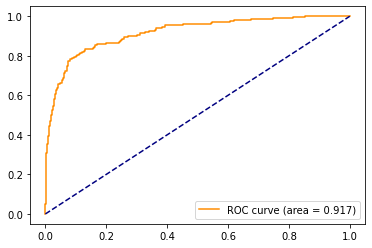

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
try_model(LogisticRegression, X_train, y_train, X_test, y_test)

### Сохраним submission

LogisticRegression
Accuracy: 0.9111257406188282
Precision: 0.7688172043010753
Recall: 0.6085106382978723
F1 score: 0.679334916864608


c:\Users\shere\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Avg_Open_To_Buy
- Card_Category
- Education_Level
- Income_Category
Feature names seen at fit time, yet now missing:
- age_cat_(25.953, 35.4]
- age_cat_(35.4, 44.8]
- age_cat_(44.8, 54.2]
- age_cat_(54.2, 63.6]
- age_cat_(63.6, 73.0]
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'F'

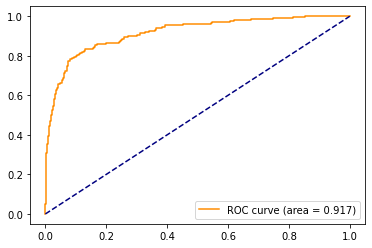

In [98]:
model = try_model(LogisticRegression, X_train, y_train, X_test, y_test)

prediction = model.predict(test) 

In [ ]:
y_pred = np.argmax(Final_model)

submission = pd.DataFrame({'client_id' : test.index,
                           'churn': y_test_pred})
submission.to_csv('submission_1.csv', index=False)

submission

In [ ]:
y_test_pred_imp = np.argmax(catboost_model_important_features.predict_proba(df_val[important_features]), axis=1)

submission = pd.DataFrame({'client_id' : df_val.index,
                           'churn': y_test_pred_imp,
                           })
submission.to_csv('submission_catboost_model_imp_feat.csv', index=False)

submission